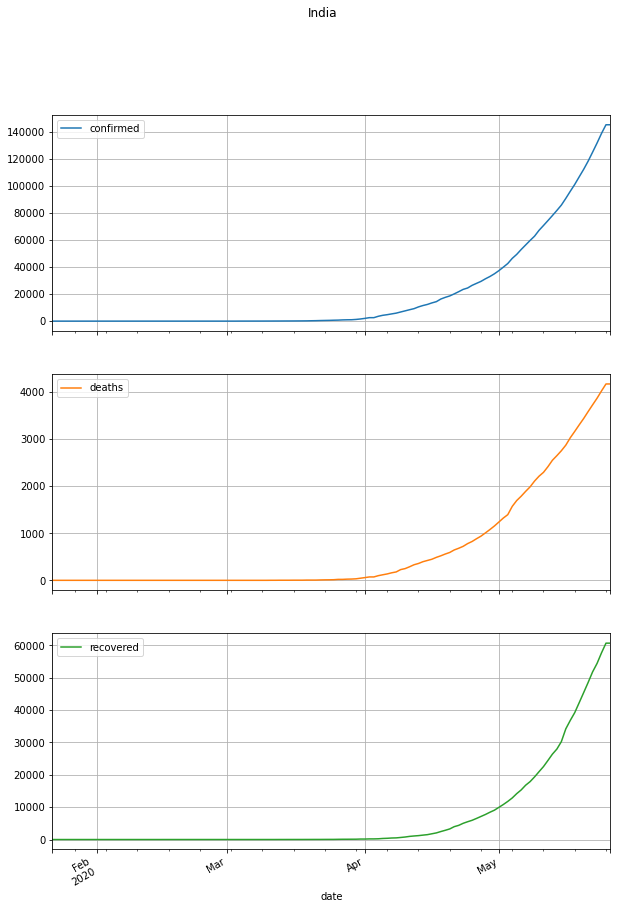

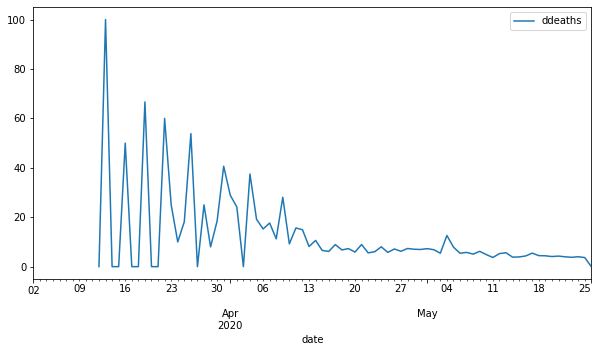

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

def getStats(country):
    api_url = 'https://api.smartable.ai/coronavirus/stats/'+country
    api_params = {
        'Cache-Control': 'no-cache',
        'Subscription-Key': '3009d4ccc29e4808af1ccc25c69b4d5d',
    }
    r = requests.get(url=api_url, params=api_params) 
    return r.text


data2 = getStats('IN')
jsonData2 = json.loads(data2)

if 'location' in jsonData2.keys():
    country2 = jsonData2['location']['countryOrRegion']
    history2 = pd.DataFrame(jsonData2['stats']['history'])
    history2['date']=pd.to_datetime(history2['date'])
    history2.plot(figsize=(10,15), x='date', title=country2, subplots=True, grid=True)
    plt.show()
    
    history2['ddeaths']=history2['deaths'].pct_change()*100
    partialhistory2 = history2[40:]
    partialhistory2.plot(x='date',y='ddeaths',figsize=(10,5))
    plt.show()
    
    #partialhistory2.plot.bar(y=['confirmed','recovered'], x='date')
    #partialhistory2.plot.bar(y=['confirmed','recovered','deaths','deaths'], x='date', subplots=True, layout=(2,2))
else:
    print("Error: make sure you have entered your registration code")
    if 'message' in jsonData2.keys():
        print(jsonData2['message'])       
       